# Demonstrate the working Of Linear Resgression and conclude Residuals , SSE, mean square error, root mean square error,R-square

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array
from numpy import mean
import math

In [22]:
x= {"x":[1,2,3,4,5],"y":[2,4,5,4,5]}
df=pd.DataFrame(x)
df

,x,y
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [23]:
A=np.array(df)
Mean = np.mean(A.T,axis=1)
Mean

array([3., 4.])

In [24]:
x_mean=Mean[0]
print("X_mean : " , x_mean) 
y_mean=Mean[1]
print("Y_mean : ", y_mean  )

X_mean :  3.0
Y_mean :  4.0


In [25]:
#Calculating the distance of x and y from the mean i.e x-X_mean and y-y_mean
dist= A-Mean
dist

array([[-2., -2.],
       [-1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 2.,  1.]])

In [26]:
df['x_min_x_mean']=dist[:,0]
df

,x,y,x_min_x_mean
0,1,2,-2.0
1,2,4,-1.0
2,3,5,0.0
3,4,4,1.0
4,5,5,2.0


In [27]:
df['y_min_y_mean']=dist[:,1]
df

,x,y,x_min_x_mean,y_min_y_mean
0,1,2,-2.0,-2.0
1,2,4,-1.0,0.0
2,3,5,0.0,1.0
3,4,4,1.0,0.0
4,5,5,2.0,1.0


In [28]:
cov=sum(dist[:,0]*dist[:,1])
print(cov)
var=dist[:,0]*dist[:,0]   #Variance= Submission(x-x_mean)^2 , first square then do submission
var=sum(var)
print(var)

6.0
10.0


In [29]:
m = cov/var
print(m)
#c= y_mean- m*x_mean
c=y_mean-m*x_mean
print(c)

0.6
2.2


In [30]:
df["y_pred"]=m*df['x']+c
df

,x,y,x_min_x_mean,y_min_y_mean,y_pred
0,1,2,-2.0,-2.0,2.8
1,2,4,-1.0,0.0,3.4
2,3,5,0.0,1.0,4.0
3,4,4,1.0,0.0,4.6
4,5,5,2.0,1.0,5.2


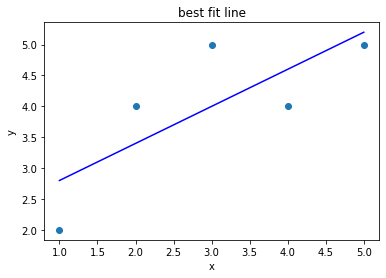

In [31]:
plt.scatter(df.x,df.y)
plt.title('best fit line')
plt.plot(df.x,m*df.x+c,"b-")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [32]:
#now calculating the residual error i.e E

df['E']=df['y']-df['y_pred']
df

,x,y,x_min_x_mean,y_min_y_mean,y_pred,E
0,1,2,-2.0,-2.0,2.8,-0.8
1,2,4,-1.0,0.0,3.4,0.6
2,3,5,0.0,1.0,4.0,1.0
3,4,4,1.0,0.0,4.6,-0.6
4,5,5,2.0,1.0,5.2,-0.2


In [33]:
#now calculating the SSE i.e sum(E^2) (sum of Squares error)
df["E_square"]=df['E']**2
print(df)
sse= sum(df['E_square'])
print(sse)

   x  y  x_min_x_mean  y_min_y_mean  y_pred    E  E_square
0  1  2          -2.0          -2.0     2.8 -0.8      0.64
1  2  4          -1.0           0.0     3.4  0.6      0.36
2  3  5           0.0           1.0     4.0  1.0      1.00
3  4  4           1.0           0.0     4.6 -0.6      0.36
4  5  5           2.0           1.0     5.2 -0.2      0.04
2.3999999999999995


In [35]:
#now calculating the mean squared error i.e submission E^2/ no. of sample (N)

N=df.count().iloc[0]
MSE= sse/ N
print(MSE)

0.47999999999999987


In [38]:
# calculating the root mean squared error i.e rmse= Square root of mse
rmse= math.sqrt(MSE)
rmse

0.6928203230275508

In [39]:
#calculating the R square 
df['y_min_y_mean_square']=df['y_min_y_mean']**2

In [40]:
tss=sum(df.y_min_y_mean_square)
tss

6.0

In [41]:
r_sqaure= 1-sse/tss
r_sqaure

0.6000000000000001